# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### 1. Carga las librerias que consideres comunes al notebook

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [75]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

df = pd.read_csv(url, names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Establecemos primeramente lo que es la semilla
np.random.seed(42)

X = df.iloc[:, :-1].values #elegimos todas las columnas excepto la ultima (nuestro target)
y = df.iloc[:, -1].values #variable target --> en nuestro caso es "class"

# Creamos el estimador base DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(random_state=42)

# Creamos el BaggingClassifier con el estimador base en este caso DecisionTreeClassifier, combinando 100
modelo = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Realizamos la validación cruzada con 10 folds (cv = 10)
scores = cross_val_score(modelo, X, y, cv=10)

#Hacemos un print de los scores de cada uno de los 10 folds.
print(f"Los scores de la validación cruzada son: {scores}")

Los scores de la validación cruzada son: [0.7012987  0.77922078 0.79220779 0.66233766 0.76623377 0.79220779
 0.83116883 0.85714286 0.72368421 0.80263158]


### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [78]:
from sklearn.ensemble import RandomForestClassifier

#Vamos a establecer la semilla primeramente:
np.random.seed(42)

X1 = df.iloc[:,:-1].values
y1 = df.iloc[:,-1].values

#Realizamos ahora la clasificación con el modelo de Random Forest
modelo1 = RandomForestClassifier(n_estimators=100, random_state=42,max_features=3)

#Realizamos la validación cruzada con cv=10
scores1 = cross_val_score(modelo1, X1, y1, cv=10)

#Hacemos un print de los scores de cada uno de los 10 folds.
print(f"Los scores de la validación cruzada son: {scores1}")

Los scores de la validación cruzada son: [0.72727273 0.79220779 0.77922078 0.66233766 0.72727273 0.77922078
 0.83116883 0.87012987 0.71052632 0.80263158]


### 5. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

#Añadimos la semilla elegida (42):
np.random.seed(42)

X2 = df.iloc[:,:-1].values
y2 = df.iloc[:,-1].values

#Realizamos el modelo de GradientBoostingClassifier con 100 estimadores
modelo2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=3,random_state=42)

#Realizamos el cross validation con cv=10
scores2 = cross_val_score(modelo2,X2,y2,cv=10)

#Hacemos un print de los scores de cada uno de los 10 folds.
print(f"Los scores de la validación cruzada son: {scores2}")

Los scores de la validación cruzada son: [0.71428571 0.72727273 0.74025974 0.67532468 0.74025974 0.7012987
 0.81818182 0.74025974 0.75       0.76315789]


### 6. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [80]:
!pip install xgboost
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import xgboost

#Añadimos la semilla elegida (42):
np.random.seed(42)

X3 = df.iloc[:,:-1].values
y3 = df.iloc[:,-1].values

#Creamos un modelo llamado XGBClassifier 
modelo3 = xgboost.XGBClassifier(random_state=42,n_estimators=100)

#Realizamos el cross validation con cv = 10
scores3 = cross_val_score(modelo3,X3,y3,cv=10)

#Hacemos un print de los scores de cada uno de los 10 folds.
print(f"Los scores de la validación cruzada son: {scores3}")

Los scores de la validación cruzada son: [0.72727273 0.75324675 0.71428571 0.68831169 0.7012987  0.79220779
 0.76623377 0.81818182 0.69736842 0.77631579]


### 7. Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

Comparativa de los modelos:
           Algoritmo  Score Medio  Desviación Estándar
0            Bagging       0.7708               0.0565
1      Random Forest       0.7682               0.0585
3            XGBoost       0.7435               0.0421
2  Gradient Boosting       0.7370               0.0363


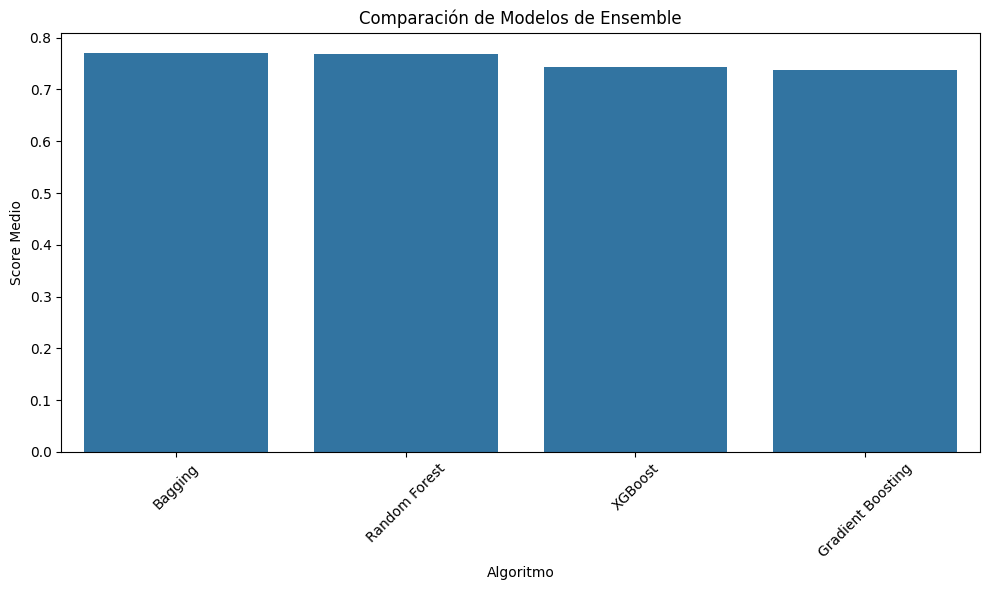

In [82]:
#Para ello, vamos a crear un diccionario con los resultados
resultados = {
    'Bagging': np.mean(scores),
    'Random Forest': np.mean(scores1),
    'Gradient Boosting': np.mean(scores2),
    'XGBoost': np.mean(scores3)
}

#Creamos un DataFrame y ordenamos
df_resultados = pd.DataFrame({
    'Algoritmo': resultados.keys(),
    'Score Medio': resultados.values(),
    'Desviación Estándar': [scores.std(), scores1.std(), scores2.std(), scores3.std()]
})

#Ordenamos de mayor a menor según el score medio
df_resultados = df_resultados.sort_values('Score Medio', ascending=False)

#Formateamos los valores numéricos
df_resultados['Score Medio'] = df_resultados['Score Medio'].round(4)
df_resultados['Desviación Estándar'] = df_resultados['Desviación Estándar'].round(4)

print("Comparativa de los modelos:")
print(df_resultados)

#Como opcional: Realizamos una visualización con barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados, x='Algoritmo', y='Score Medio')
plt.title('Comparación de Modelos de Ensemble')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9. Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

#### BAGGING

In [83]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Establecemos primeramente lo que es la semilla
np.random.seed(42)

X4 = df.iloc[:, :-1] #elegimos todas las columnas excepto la ultima (nuestro target)
y4 = df.iloc[:, -1] #variable target --> en nuestro caso es "class"

#Division entre train/test
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y4,test_size=0.20,random_state=42)

base_estimator = DecisionTreeClassifier(random_state=42,max_depth=3)

#Vamos a definir los parámetros para el bagging
param_grid = {'n_estimators':[10,50,100,150],
              'max_features':[0.5,0.7,1.0]}

#Realizamos ahora el GridSearchCV:
bagging = BaggingClassifier(estimator=base_estimator,random_state=42)
grid_bagging = GridSearchCV(bagging,param_grid,cv=10,scoring='accuracy')
grid_bagging.fit(X4_train,y4_train)

#Mostramos los resultados:
print(f"Mejores parámetros : {grid_bagging.best_params_}")
print(f"El mejor modelo de bagging es: " + str(grid_bagging.best_estimator_))
print(f"Accuracy score (train): " + str(grid_bagging.score(X4_train,y4_train)))
print(f"Accuracy score (test): " + str(grid_bagging.score(X4_test,y4_test)))

#Realizamos ahora el GridSearchCV:
bagging = BaggingClassifier(estimator=base_estimator,random_state=42)
grid_bagging = GridSearchCV(bagging,param_grid,cv=10,scoring='recall')
grid_bagging.fit(X4_train,y4_train)

print(f"Recall score (train): " + str(grid_bagging.score(X4_train,y4_train)))
print(f"Recall score (test): " + str(grid_bagging.score(X4_test,y4_test)))

#Realizamos ahora el GridSearchCV:
bagging = BaggingClassifier(estimator=base_estimator,random_state=42)
grid_bagging = GridSearchCV(bagging,param_grid,cv=10,scoring='precision')
grid_bagging.fit(X4_train,y4_train)

print(f"Precision score (train): " + str(grid_bagging.score(X4_train,y4_train)))
print(f"Precision score (test): " + str(grid_bagging.score(X4_test,y4_test)))

Mejores parámetros : {'max_features': 0.7, 'n_estimators': 150}
El mejor modelo de bagging es: BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                   random_state=42),
                  max_features=0.7, n_estimators=150, random_state=42)
Accuracy score (train): 0.7931596091205212
Accuracy score (test): 0.7922077922077922
Recall score (train): 0.5352112676056338
Recall score (test): 0.5636363636363636
Precision score (train): 0.8548387096774194
Precision score (test): 0.8333333333333334


#### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

#Vamos a establecer la semilla primeramente:
np.random.seed(42)

X5 = df.iloc[:,:-1].values
y5 = df.iloc[:,-1].values

#Division entre train/test
X5_train,X5_test,y5_train,y5_test = train_test_split(X5,y5,test_size=0.20,random_state=42)

#Vamos a definir los parámetros para el bagging
param_grid = {'n_estimators':[10,50,100,150],
              'max_features':[0.5,0.7,1.0]}

#Realizamos ahora la clasificación con el modelo de Random Forest
modelo5 = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=3)
grid_rf = GridSearchCV(modelo5,param_grid,cv=10,scoring='accuracy')
grid_rf.fit(X5_train,y5_train)

#Mostramos los resultados:
print(f"Mejores parámetros : {grid_rf.best_params_}")
print(f"El mejor modelo de random forest es: " + str(grid_rf.best_estimator_))
print(f"Accuracy score (train): " + str(grid_rf.score(X5_train,y5_train)))
print(f"Accuracy score (test): " + str(grid_rf.score(X5_test,y5_test)))

#Realizamos ahora la clasificación con el modelo de Random Forest
modelo5 = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=3)
grid_rf = GridSearchCV(modelo5,param_grid,cv=10,scoring='recall')
grid_rf.fit(X5_train,y5_train)

print(f"Recall score (train): " + str(grid_rf.score(X5_train,y5_train)))
print(f"Recall score (test): " + str(grid_rf.score(X5_test,y5_test)))

#Realizamos ahora la clasificación con el modelo de Random Forest
modelo5 = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=3)
grid_rf = GridSearchCV(modelo5,param_grid,cv=10,scoring='precision')
grid_rf.fit(X5_train,y5_train)

print(f"Precision score (train): " + str(grid_rf.score(X5_train,y5_train)))
print(f"Precision score (test): " + str(grid_rf.score(X5_test,y5_test)))

Mejores parámetros : {'max_features': 0.5, 'n_estimators': 50}
El mejor modelo de random forest es: RandomForestClassifier(max_depth=3, max_features=0.5, n_estimators=50,
                       random_state=42)
Accuracy score (train): 0.7882736156351792
Accuracy score (test): 0.7662337662337663
Recall score (train): 0.5727699530516432
Recall score (test): 0.6
Precision score (train): 0.7748344370860927
Precision score (test): 0.7111111111111111


#### Gradient Boosting

In [87]:
#Añadimos la semilla elegida (42):
np.random.seed(42)

X6 = df.iloc[:,:-1].values
y6 = df.iloc[:,-1].values

#Division entre train/test
X6_train,X6_test,y6_train,y6_test = train_test_split(X6,y6,test_size=0.20,random_state=42)

#Vamos a definir los parámetros para el bagging
param_grid = {'n_estimators':[10,50,100,150],
              'max_features':[0.5,0.7,1.0]}

#Realizamos el modelo de GradientBoostingClassifier con 100 estimadores
modelo6 = GradientBoostingClassifier(n_estimators=100, max_depth=3,random_state=42)
grid_gbc = GridSearchCV(modelo6,param_grid,cv=10,scoring='accuracy')
grid_gbc.fit(X6_train,y6_train)

#Mostramos los resultados:
print(f"Mejores parámetros : {grid_gbc.best_params_}")
print(f"El mejor modelo de gradient boosting es: " + str(grid_gbc.best_estimator_))
print(f"Accuracy score (train): " + str(grid_gbc.score(X6_train,y6_train)))
print(f"Accuracy score (test): " + str(grid_gbc.score(X6_test,y6_test)))

#Realizamos el modelo de GradientBoostingClassifier con 100 estimadores
modelo6 = GradientBoostingClassifier(n_estimators=100, max_depth=3,random_state=42)
grid_gbc = GridSearchCV(modelo6,param_grid,cv=10,scoring='recall')
grid_gbc.fit(X6_train,y6_train)

print(f"Recall score (train): " + str(grid_gbc.score(X6_train,y6_train)))
print(f"Recall score (test): " + str(grid_gbc.score(X6_test,y6_test)))

#Realizamos el modelo de GradientBoostingClassifier con 100 estimadores
modelo6 = GradientBoostingClassifier(n_estimators=100, random_state=42,max_depth=3)
grid_gbc = GridSearchCV(modelo6,param_grid,cv=10,scoring='precision')
grid_gbc.fit(X6_train,y6_train)

print(f"Precision score (train): " + str(grid_gbc.score(X6_train,y6_train)))
print(f"Precision score (test): " + str(grid_gbc.score(X6_test,y6_test)))

Mejores parámetros : {'max_features': 0.5, 'n_estimators': 50}
El mejor modelo de gradient boosting es: GradientBoostingClassifier(max_features=0.5, n_estimators=50, random_state=42)
Accuracy score (train): 0.8778501628664495
Accuracy score (test): 0.7597402597402597
Recall score (train): 0.9014084507042254
Recall score (test): 0.6727272727272727
Precision score (train): 0.8559322033898306
Precision score (test): 0.775


#### XGBOOST

In [88]:
import xgboost

#Añadimos la semilla elegida (42):
np.random.seed(42)

X7 = df.iloc[:,:-1].values
y7 = df.iloc[:,-1].values

#Division entre train/test
X7_train,X7_test,y7_train,y7_test = train_test_split(X7,y7,test_size=0.20,random_state=42)

#Vamos a definir los parámetros para el bagging
param_grid = {'n_estimators':[10,50,100,150],
              'max_features':[0.5,0.7,1.0]}

#Creamos un modelo llamado XGBClassifier 
modelo7 = xgboost.XGBClassifier(random_state=42,n_estimators=100)
grid_xb = GridSearchCV(modelo7,param_grid,cv=10,scoring='accuracy')
grid_xb.fit(X7_train,y7_train)

#Mostramos los resultados:
print(f"Mejores parámetros : {grid_xb.best_params_}")
print(f"El mejor modelo de XGBoosting es: " + str(grid_xb.best_estimator_))
print(f"Accuracy score (train): " + str(grid_xb.score(X7_train,y7_train)))
print(f"Accuracy score (test): " + str(grid_xb.score(X7_test,y7_test)))

#Creamos un modelo llamado XGBClassifier 
modelo7 = xgboost.XGBClassifier(random_state=42,n_estimators=100)
grid_xb = GridSearchCV(modelo7,param_grid,cv=10,scoring='recall')
grid_xb.fit(X7_train,y7_train)

print(f"Recall score (train): " + str(grid_xb.score(X7_train,y7_train)))
print(f"Recall score (test): " + str(grid_xb.score(X7_test,y7_test)))

#Creamos un modelo llamado XGBClassifier 
modelo7 = xgboost.XGBClassifier(random_state=42,n_estimators=100)
grid_xb = GridSearchCV(modelo7,param_grid,cv=10,scoring='precision')
grid_xb.fit(X7_train,y7_train)

print(f"Precision score (train): " + str(grid_xb.score(X7_train,y7_train)))
print(f"Precision score (test): " + str(grid_xb.score(X7_test,y7_test)))

C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
C:\U

Mejores parámetros : {'max_features': 0.5, 'n_estimators': 150}
El mejor modelo de XGBoosting es: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_features=0.5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)
Accuracy score (train): 1.0
Accuracy score (test): 0.7142857142857143


C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:07:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:07:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:07:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
C:\U

Recall score (train): 1.0
Recall score (test): 0.6545454545454545


C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:07:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:07:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [17:07:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
C:\U

Precision score (train): 1.0
Precision score (test): 0.5901639344262295


### 10. Conclusiones finales

In [ ]:
resultados = { #Creamos otro diccionario para realizar la comparación
    'Modelo': [],
    'Accuracy Train': [],
    'Accuracy Test': [],
    'Mejores Parámetros': []
}

#Bagging
resultados['Modelo'].append('Bagging')
resultados['Accuracy Train'].append(grid_bagging.score(X4_train, y4_train))
resultados['Accuracy Test'].append(grid_bagging.score(X4_test, y4_test))
resultados['Mejores Parámetros'].append(grid_bagging.best_params_)

#Random Forest
resultados['Modelo'].append('Random Forest')
resultados['Accuracy Train'].append(grid_rf.score(X5_train, y5_train))
resultados['Accuracy Test'].append(grid_rf.score(X5_test, y5_test))
resultados['Mejores Parámetros'].append(grid_rf.best_params_)

#Gradient Boosting
resultados['Modelo'].append('Gradient Boosting')
resultados['Accuracy Train'].append(grid_gbc.score(X6_train, y6_train))
resultados['Accuracy Test'].append(grid_gbc.score(X6_test, y6_test))
resultados['Mejores Parámetros'].append(grid_gbc.best_params_)

#XGBoost
resultados['Modelo'].append('XGBoost')
resultados['Accuracy Train'].append(grid_xb.score(X7_train, y7_train))
resultados['Accuracy Test'].append(grid_xb.score(X7_test, y7_test))
resultados['Mejores Parámetros'].append(grid_xb.best_params_)

#Crear DataFrame y ordenar por Accuracy Test
df_resultados = pd.DataFrame(resultados).sort_values('Accuracy Test', ascending=False)

print("Comparativa de modelos:")
print(df_resultados)

Comparativa de modelos:
              Modelo  Accuracy Train  Accuracy Test  \
0            Bagging        0.854839       0.833333   
2  Gradient Boosting        0.855932       0.775000   
1      Random Forest        0.774834       0.711111   
3            XGBoost        1.000000       0.590164   

                           Mejores Parámetros  
0   {'max_features': 0.5, 'n_estimators': 50}  
2   {'max_features': 0.5, 'n_estimators': 10}  
1   {'max_features': 0.5, 'n_estimators': 50}  
3  {'max_features': 0.5, 'n_estimators': 150}  
